In [9]:
import numpy
import matplotlib.pyplot as plt

We start by generating some random data

In [3]:
# Generate some data
x = numpy.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
print(x)
y = numpy.array([ 1,  2,  3,  4,  5,  6,  7,  7,  7,  7,  7,  7,  6,  6,  6,  5,  5,  5,  4, 1])
numpy.random.seed(seed=42)
y = numpy.random.normal(loc=5, scale = 2, size=len(x)).astype(int)
print(y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[5 4 6 8 4 4 8 6 4 6 4 4 5 1 1 3 2 5 3 2]


We visualize the data and the distribution so we can get a sense of what the GLD results should look like

In [10]:
# Determine how many bins to use for the histogram
range_of_y_values = int(max(y) - min(y)) + 1
bin_count = range_of_y_values
print("range of y values: {0} -> {1} = {2}".format(min(y), max(y), range_of_y_values))
print("bin count: {0}".format(bin_count))

# Generate histogram data for the values of 
counts, bin_edges = numpy.histogram(y, bins=bin_count)
print("edges: {0}".format(bin_edges))
print("num of edges: {0}".format(len(bin_edges)))
print("counts: {0}".format(counts))
print("num of counts: {0}".format(len(counts)))

# Determine the midpoints of the bin
bin_widths = numpy.diff(bin_edges)
distance_from_lower_din_edge = bin_widths/2
bin_midpoints = bin_edges[:-1] + bin_widths
print("bin midpoints: {0}".format(bin_midpoints))

# Calculate the probability of the given bin
N = range_of_y_values
p = numpy.array([counts[i]/N  for i in range(0, N)])
F = p.cumsum()

import pandas
print(pandas.DataFrame({"y": bin_midpoints, "c": counts}))
print(pandas.DataFrame({"y": bin_midpoints, "p": p}))

range of y values: 1 -> 8 = 8
bin count: 8
edges: [1.    1.875 2.75  3.625 4.5   5.375 6.25  7.125 8.   ]
num of edges: 9
counts: [2 2 2 6 3 3 0 2]
num of counts: 8
bin midpoints: [1.875 2.75  3.625 4.5   5.375 6.25  7.125 8.   ]
       y  c
0  1.875  2
1  2.750  2
2  3.625  2
3  4.500  6
4  5.375  3
5  6.250  3
6  7.125  0
7  8.000  2
       y      p
0  1.875  0.250
1  2.750  0.250
2  3.625  0.250
3  4.500  0.750
4  5.375  0.375
5  6.250  0.375
6  7.125  0.000
7  8.000  0.250


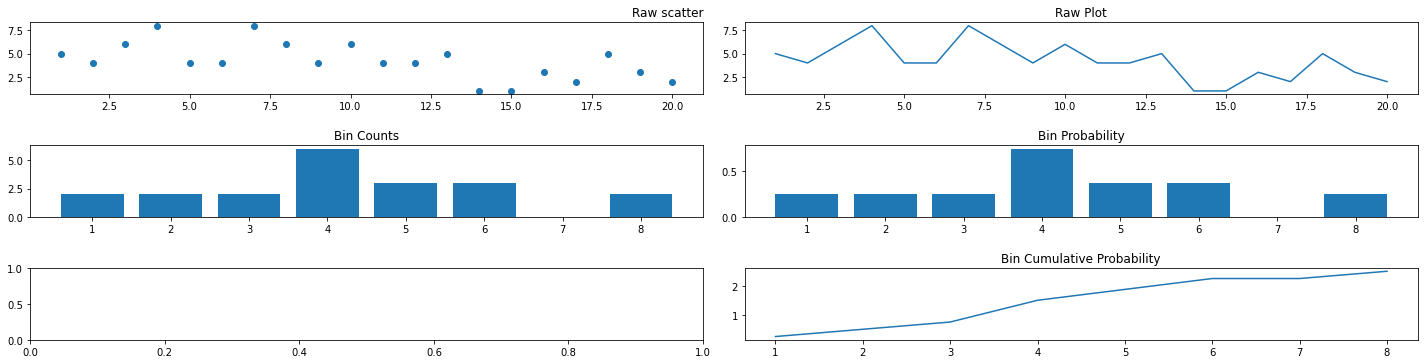

In [11]:
# Get setup to print a series of charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 5))
fig.tight_layout(h_pad=3)
axes[0, 0].scatter(x, y)
axes[0, 0].set_title(label="Raw scatter", loc="right")
axes[0, 1].plot(x, y)
axes[0, 1].set_title(label="Raw Plot")
axes[1, 0].bar(numpy.arange(min(y), max(y)+1), counts)
axes[1, 0].set_title(label="Bin Counts")
axes[1, 1].bar(numpy.arange(min(y), max(y)+1), p)
axes[1, 1].set_title(label="Bin Probability")
axes[2, 1].plot(numpy.arange(min(y), max(y)+1), F)
axes[2, 1].set_title(label="Bin Cumulative Probability");

We now collect the moments for our sample data

In [21]:
import scipy.stats
moments = [
    y.mean(),
    y.var(),    
    scipy.stats.skew(y),
    scipy.stats.kurtosis(y)
]
moments

[4.25, 3.6875, 0.19329743393085036, -0.4117207698937091]

We use the method of moments to solve our GLD equations and derive values of lambda

The moments of the GLD ($\alpha_1 ... \alpha_4$) are going to be estimates supplied by the moments of the sample data set we are trying to fit.

$\alpha_1 = \frac{A}{\lambda_2} $

$ \alpha_2 = \frac{B-A^2}{\lambda_2^2} $

$ \alpha_3 = \frac{C-3AB+2A^3}{\lambda_2^3\sigma^3} $

$ \alpha_4 = \frac{D-4AC+6A^2B-3A^4}{\lambda_2^4\sigma^4} $

To simplify the equations for the moments, they are written in terms of several utility equations:

$ A=\frac{1}{1+\lambda_3}-\frac{1}{1+\lambda_4} $

$ B=\frac{1}{1+\lambda_2}-\frac{1}{1+2\lambda_4}-2\beta(1+\lambda_3,1+\lambda_4) $

$ C=\frac{1}{1+3\lambda_3}-\frac{1}{1+3\lambda_4}-3\beta(1+2\lambda_3,1+\lambda_4)+3\beta(1+\lambda_3,1+2\lambda_4)$

$ D=\frac{1}{1+4\lambda_3}+\frac{1}{1+4\lambda_4}-4\beta(1+3\lambda_3,1+\lambda_4)+6\beta(1+2\lambda_3,1+2\lambda_4)-4\beta(1+\lambda_3,1+3\lambda_4) $

The $\beta$ term used in these expressions is referred to as a beta function and is defined such that:

$ \beta(a,b) = \int_0^1 x^{a-1} (1 - x)^{b-1} dx $


In [14]:
# Define our alpha
a1 = moments[0]
a2 = moments[1]
a3 = moments[2]
a4 = moments[3]

In [58]:
# Define our lambda
l1 = sympy.Symbol('l1')
l2 = sympy.Symbol('l2')
l3 = sympy.Symbol('l3')
l4 = sympy.Symbol('l4')

In [74]:
# Define our utility symbols
sigma = y.std()

In [75]:
# Our utility functions
A = 1/(1 + l3) - 1/(1 + l4)
B = 1/(1 + 2 * l3) + 1/(1 + 2 * l4) - 2 * sympy.beta(1 + l3, 1 + l4)
C = 1/(1 + 3 * l3) - 1/(1 + 3 * l4) - 3 * sympy.beta(1 + 2 * l3, 1 + l4) + 3 * sympy.beta(1 + l3, 1 + 2 * l4)
D = 1/(1 + 4 * l3) + 1/(1 + 4 * l4) - 4 * sympy.beta(1 + 3 * l3, 1 + l4) + 6 * sympy.beta(1 + 2 * l3,1 + 2 * l4) - 4*sympy.beta(1+l3,1+3*l4)

In [76]:
A

-1/(l4 + 1) + 1/(l3 + 1)

In [67]:
B

-2*beta(l3 + 1, l4 + 1) + 1/(2*l4 + 1) + 1/(2*l3 + 1)

In [68]:
C

3*beta(l3 + 1, 2*l4 + 1) - 3*beta(2*l3 + 1, l4 + 1) - 1/(3*l4 + 1) + 1/(3*l3 + 1)

In [69]:
D

-4*beta(l3 + 1, 3*l4 + 1) + 6*beta(2*l3 + 1, 2*l4 + 1) - 4*beta(3*l3 + 1, l4 + 1) + 1/(4*l4 + 1) + 1/(4*l3 + 1)

In [72]:
eq1 = a1 - l1 - (A / l2)
eq1

-l1 + 4.25 - (-1/(l4 + 1) + 1/(l3 + 1))/l2

In [73]:
eq2 = a2 - (B - A**2) / l2**2
eq2

1.92028643696715 - (-(-1/(l4 + 1) + 1/(l3 + 1))**2 - 2*beta(l3 + 1, l4 + 1) + 1/(2*l4 + 1) + 1/(2*l3 + 1))/l2**2

In [77]:
# Define our equations
equations = [
    # Our alpha
    a1 - l1 - (A / l2),
    a2 - (B - A**2) / l2**2,
    a3 - (C - 3 * A * B + 2 * A**3) / (l2**3 * sigma**3),
    a4 - (D - 4 * A * C + 6 * A**2 * B - 3 * A**4) / (l2**4 * sigma**4),
]
symbols = [l1,l2,l3,l4]

In [ ]:
sympy.solvers.solve(equations, *symbols)